In [1]:
%matplotlib notebook
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import unittest
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from deepART import ProbART, base, dataset
from sklearn.datasets import make_moons

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Generate dataset

In [3]:
np.random.seed(0)
cluster_1 = np.random.uniform(low=0, high=0.65, size=(100, 2))
cluster_2 = np.random.uniform(low=0.35, high=1, size=(100, 2))
x = np.vstack((cluster_1, cluster_2))
y = np.array(([0] * 100) + ([1] * 100))
sample_data = dataset.Dataset(x)

In [4]:
# np.random.seed(0)
# sample_data = dataset.Clusters2d_overlap(nclusters=2,overlap=0.8,spread=0.3, npoints=100, data_range=[0.6,1])
#sample_data = dataset.TwoSpirals(100, noise=1)

# X, y = make_moons(n_samples=200, noise=0.05)
# sample_data = dataset.Dataset(X+0.5)

#npoints = 200
#sample_data = dataset.TwoSpirals(npoints, noise=30)

<IPython.core.display.Javascript object>


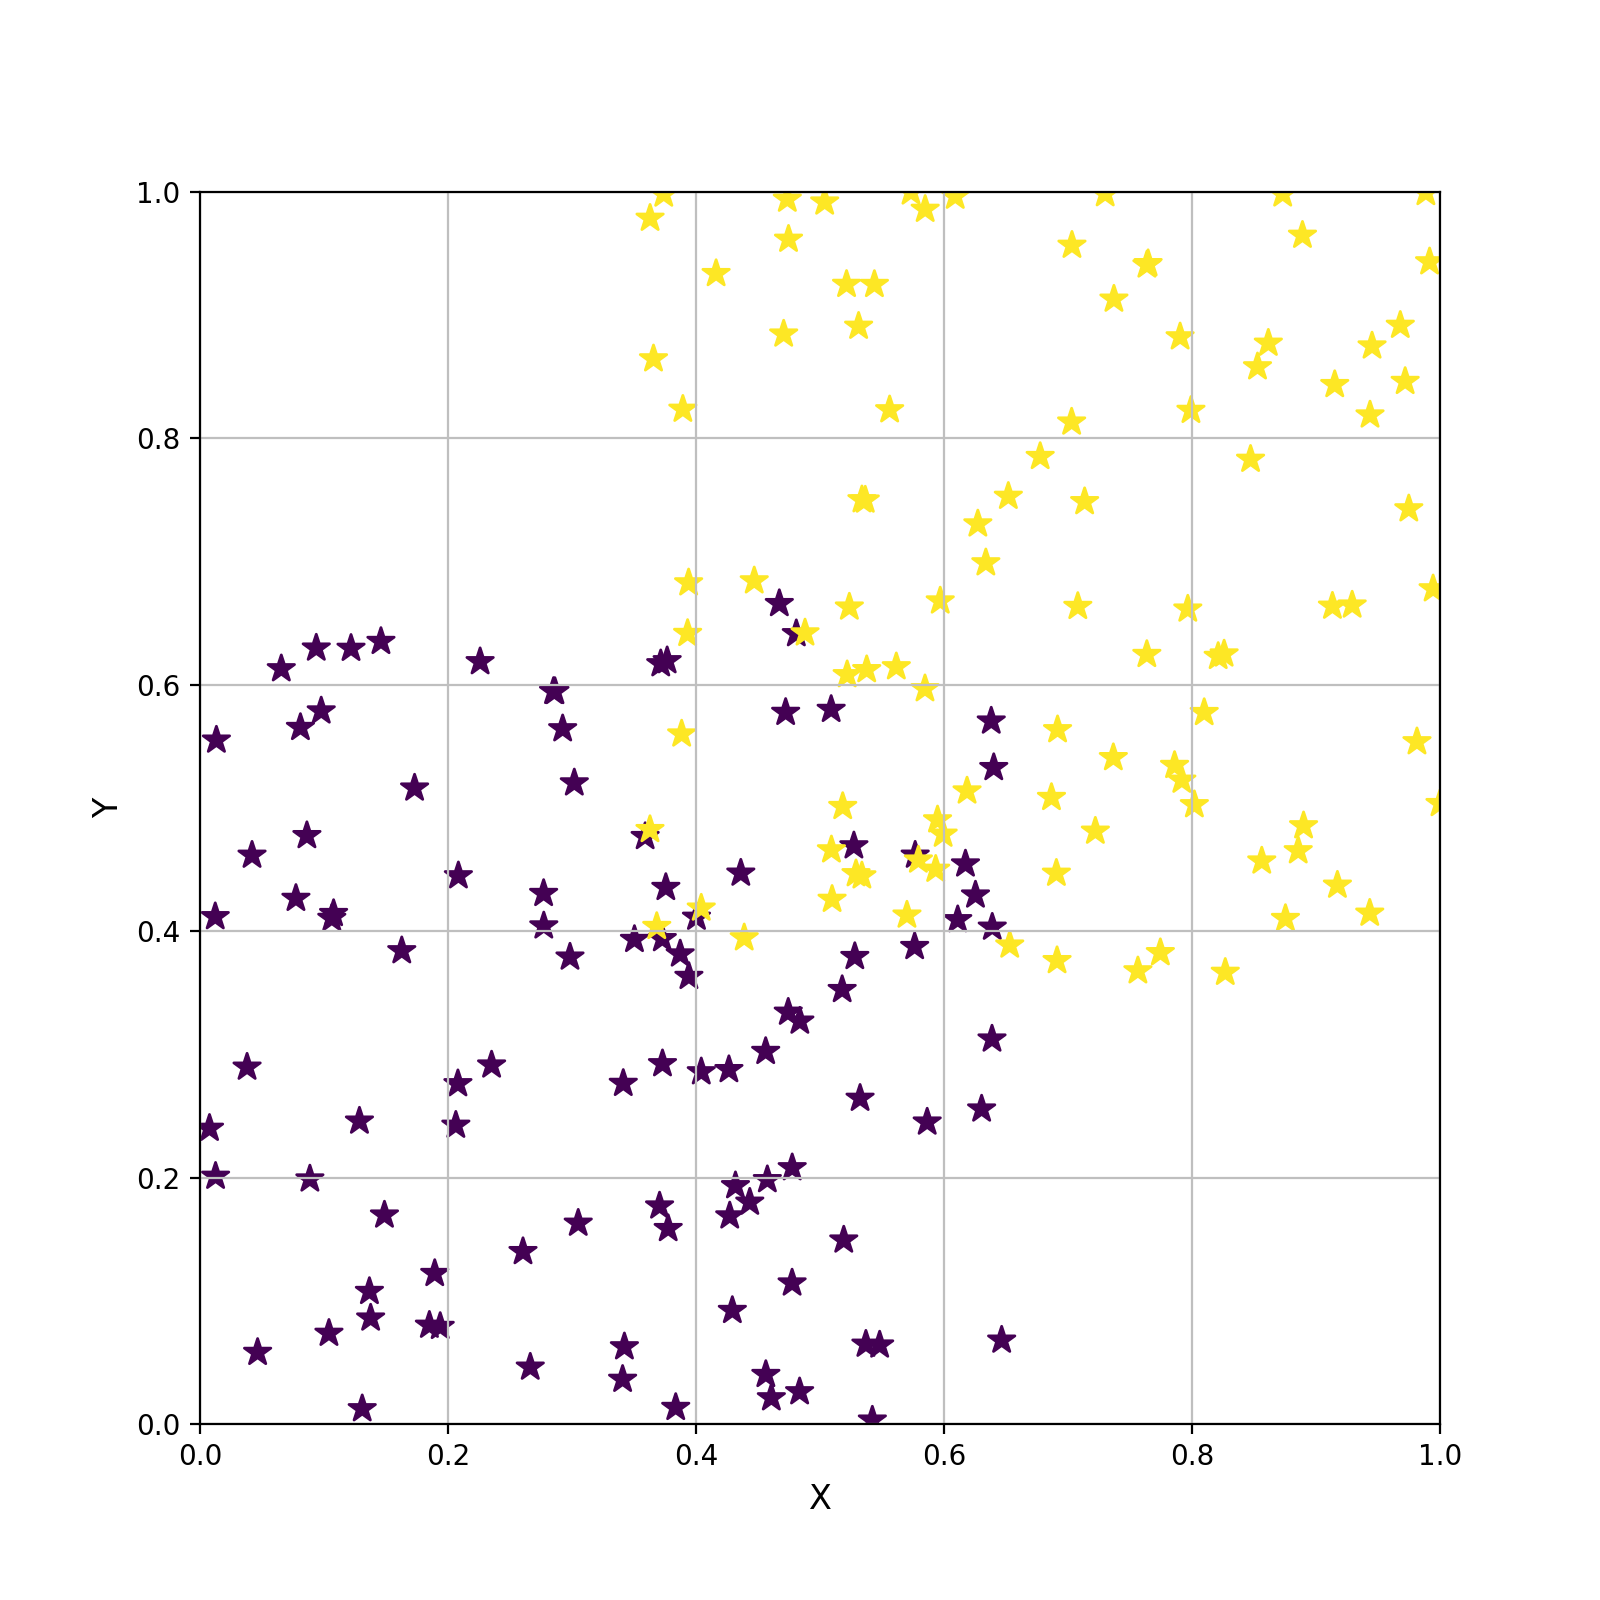

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=y,marker='*')
ax.axis((0, 1, 0, 1))
# plt.ylim(0.4, 1.1)
# plt.xlim(0.6, 1.1)
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

In [6]:
# convergence = 10
# neurons = 50
# rho = 0.2
# beta = 0.75
# alpha = 0.1
neurons = 85
rho = 0.371615311514365
beta = 0.0228931793277781
alpha = 0.618937443063195
seed = 0
camRule = {'p': 1, 'q': None}
fastEncode = 0.448102600026146
convergence = 11
network = ProbART( 2, neurons, rho=rho,alpha=alpha, beta=beta,comp=True, camRule=camRule, fastEncode=fastEncode, seed=seed)
print("Start testing...")


#convergence tracking variables
prev_active = 0
converge = 0
results = []
while True:
    for I in sample_data.data_normalized:
        print(I.ravel())
        Z, k = network.fit_predict(I.ravel()) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n\n\n")
        else:
            print("Unrecognized pattern:\n")



    if (prev_active < network.active):
        prev_active = network.active
        continue
    else:
        converge +=1
        if converge > convergence:
            print("Total Neurons Learned: {}\n\n".format(network.active))
            break

Start testing...
[0.3589831  0.47678283]
zJ:	[[0.71275866 0.76554503]
 [0.83913874 0.78635239]]

Cluster:	0






[0.39427212 0.36324778]
zJ:	[array([[0.70546749, 0.75633516],
       [0.83379522, 0.78292757]])]

Cluster:	[(0, 1.0)]






[0.27711585 0.430587  ]
zJ:	[array([[0.69566116, 0.74887775],
       [0.83125612, 0.77803954]])]

Cluster:	[(0, 1.0)]






[0.28622913 0.59450275]
zJ:	[array([[0.68628796, 0.74534362],
       [0.82856651, 0.76951086]])]

Cluster:	[(0, 1.0)]






[0.63033915 0.25562227]
zJ:	[array([[0.68500711, 0.73413234],
       [0.8180607 , 0.76893548]])]

Cluster:	[(0, 1.0)]






[0.51787335 0.3525892 ]
zJ:	[array([[0.68118089, 0.7253976 ],
       [0.8103701 , 0.7661534 ]])]

Cluster:	[(0, 1.0)]






[0.37156227 0.6170514 ]
zJ:	[array([[0.67409273, 0.72291721],
       [0.80620509, 0.75738062]])]

Cluster:	[(0, 1.0)]






[0.04646523 0.05808498]
zJ:	[array([[0.65972435, 0.70769709],
       [0.80620509, 0.75738062]])]

Cluster:	[(0, 1.0)]






[0.01322501 0.5550

[0.57012457 0.41303322]
zJ:	[array([[0.32802033, 0.32156658],
       [0.43454411, 0.42549249]])]

Cluster:	[(0, 0.9149726860325292)]






[0.6185913  0.51378626]
zJ:	[array([[0.32802033, 0.32156658],
       [0.43349836, 0.42549249]])]

Cluster:	[(0, 0.8596810031069766)]






[0.43887296 0.39458415]
zJ:	[array([[0.32802033, 0.32156658],
       [0.43349836, 0.42549249]])]

Cluster:	[(0, 0.9371259889482783)]






[0.82682854 0.3665849 ]
zJ:	[array([[0.32802033, 0.32156658],
       [0.4291011 , 0.42549249]])]

Cluster:	[(0, 0.7378310655826578)]






[0.8562545  0.45692912]
zJ:	[array([[0.32802033, 0.32156658],
       [0.42519566, 0.42549249]])]

Cluster:	[(0, 0.5978293142937169)]






[0.4042278  0.41870084]
zJ:	[array([[0.32802033, 0.32156658],
       [0.42519566, 0.42549249]])]

Cluster:	[(0, 0.9388653431503239)]






[0.79180336 0.52254146]
zJ:	[array([[0.32802033, 0.32156658],
       [0.42182342, 0.42549249]])]

Cluster:	[(0, 0.6788199849337017)]






[0.6272899  0.73053813]
zJ:


[0.1077277 0.4143102]
zJ:	[array([[0.22357231, 0.21004587],
       [0.39484181, 0.40105061]])]

Cluster:	[(0, 0.9605963571385148)]






[0.3775696  0.15859187]
zJ:	[array([[0.22357231, 0.2089022 ],
       [0.39484181, 0.40105061]])]

Cluster:	[(0, 0.9709018294114456)]






[0.61107653 0.409302  ]
zJ:	[array([[0.22357231, 0.2089022 ],
       [0.39472818, 0.40105061]])]

Cluster:	[(0, 0.8386652988708921)]






[0.35036147 0.393265  ]
zJ:	[array([[0.22357231, 0.2089022 ],
       [0.39472818, 0.40105061]])]

Cluster:	[(0, 0.9443115426595039)]






[0.47757834 0.20795894]
zJ:	[array([[0.22357231, 0.20888155],
       [0.39472818, 0.40105061]])]

Cluster:	[(0, 0.9564939702464194)]






[0.26047942 0.13989288]
zJ:	[array([[0.22357231, 0.20732888],
       [0.39472818, 0.40105061]])]

Cluster:	[(0, 0.9830946869216226)]






[0.12179026 0.62956834]
zJ:	[array([[0.2214883 , 0.20732888],
       [0.39472818, 0.40042368]])]

Cluster:	[(0, 0.8943840467462395)]






[0.48374578 0.32696563]
zJ:	


[0.5370179  0.06473281]
zJ:	[array([[0.19132921, 0.18368909],
       [0.3865236 , 0.39484473]])]

Cluster:	[(0, 0.9500865392941213)]






[0.54810613 0.06406425]
zJ:	[array([[0.19132921, 0.18109543],
       [0.3865236 , 0.39484473]])]

Cluster:	[(0, 0.9470777886608442)]






[0.63870955 0.31242752]
zJ:	[array([[0.19132921, 0.18109543],
       [0.38605534, 0.39484473]])]

Cluster:	[(0, 0.8106040443732203)]






[0.6389069  0.40322182]
zJ:	[array([[0.19132921, 0.18109543],
       [0.38564756, 0.39484473]])]

Cluster:	[(0, 0.713570617325632)]






[0.4835579  0.02612464]
zJ:	[array([[0.19132921, 0.17767237],
       [0.38564756, 0.39484473]])]

Cluster:	[(0, 0.9648461982739434)]






[0.18498619 0.08012935]
zJ:	[array([[0.1911848 , 0.17545158],
       [0.38564756, 0.39484473]])]

Cluster:	[(0, 0.9945019498201905)]






[0.19370756 0.07915014]
zJ:	[array([[0.1911848 , 0.17325929],
       [0.38564756, 0.39484473]])]

Cluster:	[(0, 0.9943965452073595)]






[0.2079952 0.2761695]
zJ:	[







[0.79180336 0.52254146]
zJ:	[array([[0.68285258, 0.6881619 ],
       [0.1983262 , 0.17249306]])]

Cluster:	[(1, 0.8801888261345376)]






[0.6272899  0.73053813]
zJ:	[array([[0.68170873, 0.6881619 ],
       [0.1983262 , 0.17249306]])]

Cluster:	[(1, 0.899253570542145)]






[0.91510487 0.8436527 ]
zJ:	[array([[0.68170873, 0.6881619 ],
       [0.19574273, 0.17212533]])]

Cluster:	[(1, 0.9948689084260108)]






[0.52903533 0.44662014]
zJ:	[array([[0.16088378, 0.14966704],
       [0.38542235, 0.39268139]])]

Cluster:	[(0, 0.742289551476035)]






[0.38843253 0.56002825]
zJ:	[array([[0.16088378, 0.14966704],
       [0.38542235, 0.39268139]])]

Cluster:	[(0, 0.7753729236461933)]






[0.52366525 0.66305405]
zJ:	[array([[0.67918919, 0.68776163],
       [0.19574273, 0.17212533]])]

Cluster:	[(1, 0.6963654643481636)]






[0.7991513 0.8227073]
zJ:	[array([[0.67918919, 0.68776163],
       [0.19574273, 0.17212533]])]

Cluster:	[(1, 0.9893128715134292)]






[0.53766364 0.61224604]
z

[0.34081402 0.03622456]
zJ:	[array([[0.13210015, 0.11994854],
       [0.38325965, 0.39086577]])]

Cluster:	[(0, 0.9894335888840495)]






[0.13081925 0.0123476 ]
zJ:	[array([[0.13207089, 0.11748989],
       [0.38325965, 0.39086577]])]

Cluster:	[(0, 0.9980997003000487)]






[0.5191637  0.14927997]
zJ:	[array([[0.13207089, 0.11748989],
       [0.38325965, 0.39086577]])]

Cluster:	[(0, 0.9480602471755722)]






[0.22589715 0.6187078 ]
zJ:	[array([[0.13207089, 0.11748989],
       [0.38325965, 0.39068444]])]

Cluster:	[(0, 0.8273369746935086)]






[0.4607628 0.0212255]
zJ:	[array([[0.13207089, 0.11534259],
       [0.38325965, 0.39068444]])]

Cluster:	[(0, 0.9743616832745937)]






[0.1077277 0.4143102]
zJ:	[array([[0.13152582, 0.11534259],
       [0.38325965, 0.39068444]])]

Cluster:	[(0, 0.9780610262150886)]






[0.3775696  0.15859187]
zJ:	[array([[0.13152582, 0.11534259],
       [0.38325965, 0.39068444]])]

Cluster:	[(0, 0.9790185009068794)]






[0.61107653 0.409302  ]
zJ:	[ar


[0.04646523 0.05808498]
zJ:	[array([[0.12731453, 0.11403318],
       [0.38260058, 0.38980725]])]

Cluster:	[(0, 0.9989348259484829)]






[0.01322501 0.5550682 ]
zJ:	[array([[0.124854  , 0.11403318],
       [0.38260058, 0.38980725]])]

Cluster:	[(0, 0.9420563536816224)]






[0.5089983 0.5799959]
zJ:	[array([[0.58175671, 0.59122798],
       [0.13467774, 0.10468965]])]

Cluster:	[(1, 0.6244068430563491)]






[0.6401217 0.5327611]
zJ:	[array([[0.58175671, 0.59027585],
       [0.13467774, 0.10468965]])]

Cluster:	[(1, 0.711346792018235)]






[0.30185717 0.52034175]
zJ:	[array([[0.124854  , 0.11403318],
       [0.38260058, 0.38980725]])]

Cluster:	[(0, 0.8279965134360069)]






[0.0773642  0.42660502]
zJ:	[array([[0.12379042, 0.11403318],
       [0.38260058, 0.38980725]])]

Cluster:	[(0, 0.9782751710719354)]






[0.09376848 0.6297659 ]
zJ:	[array([[0.12316651, 0.11403318],
       [0.38260058, 0.38940048]])]

Cluster:	[(0, 0.9077783793916026)]






[0.34134495 0.27643546]
zJ:	[ar


[0.9718941 0.8461937]
zJ:	[array([[0.56874348, 0.57883064],
       [0.12930435, 0.09977981]])]

Cluster:	[(1, 0.9980165287490967)]






[0.518317   0.50117177]
zJ:	[array([[0.56809812, 0.57783678],
       [0.12930435, 0.09977981]])]

Cluster:	[(1, 0.5590255269003197)]






[0.6911708 0.3760749]
zJ:	[array([[0.56809812, 0.57507715],
       [0.12930435, 0.09977981]])]

Cluster:	[(1, 0.5974540611997504)]






[0.48791957 0.6420844 ]
zJ:	[array([[0.56680049, 0.57507715],
       [0.12930435, 0.09977981]])]

Cluster:	[(1, 0.7069494302786796)]






[0.5969592  0.66801053]
zJ:	[array([[0.56680049, 0.57507715],
       [0.12930435, 0.09977981]])]

Cluster:	[(1, 0.8385572245818743)]






[0.53381085 0.7501481 ]
zJ:	[array([[0.56611993, 0.57507715],
       [0.12930435, 0.09977981]])]

Cluster:	[(1, 0.901117654428929)]






[0.9172663 0.4373197]
zJ:	[array([[0.56611993, 0.57208717],
       [0.12829355, 0.09977981]])]

Cluster:	[(1, 0.9480845298758053)]






[0.69063336 0.44701034]
zJ:	[arra


[0.18930273 0.12212499]
zJ:	[array([[0.10046468, 0.08684201],
       [0.38032306, 0.38768974]])]

Cluster:	[(0, 0.9964276964973836)]






[0.38364255 0.01340475]
zJ:	[array([[0.10046468, 0.08518016],
       [0.38032306, 0.38768974]])]

Cluster:	[(0, 0.9884812440009851)]






[0.542216   0.00313025]
zJ:	[array([[0.10046468, 0.08338989],
       [0.38032306, 0.38768974]])]

Cluster:	[(0, 0.9530896468481201)]






[0.44336495 0.18000151]
zJ:	[array([[0.10046468, 0.08338989],
       [0.38032306, 0.38768974]])]

Cluster:	[(0, 0.9468467097935714)]






[0.48089603 0.64144546]
zJ:	[array([[0.53659472, 0.53321585],
       [0.10780344, 0.07800895]])]

Cluster:	[(1, 0.6939462765965434)]






[0.16271132 0.38409677]
zJ:	[array([[0.10046468, 0.08338989],
       [0.38032306, 0.38768974]])]

Cluster:	[(0, 0.9720912545235275)]






[0.38725913 0.3814932 ]
zJ:	[array([[0.10046468, 0.08338989],
       [0.38032306, 0.38768974]])]

Cluster:	[(0, 0.831551623363552)]






[0.1459194 0.6351526]
zJ:	[

[0.70292956 0.8132189 ]
zJ:	[array([[0.51529358, 0.50028519],
       [0.0916456 , 0.06588713]])]

Cluster:	[(1, 0.9725378973592238)]






[0.5337895 0.444872 ]
zJ:	[array([[0.51529358, 0.49954584],
       [0.0916456 , 0.06588713]])]

Cluster:	[(1, 0.5828142092092509)]






[0.609064  0.9965571]
zJ:	[array([[0.51529358, 0.49954584],
       [0.0916456 , 0.06447788]])]

Cluster:	[(1, 0.9857996431595323)]






[0.4746155 0.96161  ]
zJ:	[array([[0.51438171, 0.49954584],
       [0.0916456 , 0.06389307]])]

Cluster:	[(1, 0.979191088659481)]






[0.7079194  0.66356796]
zJ:	[array([[0.51438171, 0.49954584],
       [0.0916456 , 0.06389307]])]

Cluster:	[(1, 0.894792378302454)]






[0.9291618 0.6646963]
zJ:	[array([[0.51438171, 0.49954584],
       [0.09117615, 0.06389307]])]

Cluster:	[(1, 0.9855125541611048)]






[0.82589537 0.62497807]
zJ:	[array([[0.51438171, 0.49954584],
       [0.09117615, 0.06389307]])]

Cluster:	[(1, 0.9487614994104089)]






[0.9435541 0.8189738]
zJ:	[array([[0.


[0.03795731 0.28960496]
zJ:	[array([[0.08273802, 0.06829138],
       [0.37927021, 0.3853983 ]])]

Cluster:	[(0, 0.9947783200271845)]






[0.55615985 0.823186  ]
zJ:	[array([[0.50814262, 0.49378891],
       [0.08881771, 0.0605111 ]])]

Cluster:	[(1, 0.9485890240222725)]






[0.5993021  0.47870004]
zJ:	[array([[0.50814262, 0.49355784],
       [0.08881771, 0.0605111 ]])]

Cluster:	[(1, 0.6689374163705057)]






[0.36835435 0.4037989 ]
zJ:	[array([[0.08273802, 0.06829138],
       [0.37927021, 0.3853983 ]])]

Cluster:	[(0, 0.7815654629454384)]






[0.79660773 0.66142493]
zJ:	[array([[0.50814262, 0.49355784],
       [0.08881771, 0.0605111 ]])]

Cluster:	[(1, 0.9550442876040992)]






[0.70319235 0.956735  ]
zJ:	[array([[0.50814262, 0.49355784],
       [0.08881771, 0.06011891]])]

Cluster:	[(1, 0.9933352733722083)]






[1.         0.50356174]
zJ:	[array([[0.50814262, 0.49355784],
       [0.08681519, 0.06011891]])]

Cluster:	[(1, 0.984851968212058)]






[0.7859363 0.5345113]
zJ:	[

[0.6173128  0.45453724]
zJ:	[array([[0.48975801, 0.47463712],
       [0.07493319, 0.04834451]])]

Cluster:	[(1, 0.6176900343493453)]






[0.23515685 0.2913485 ]
zJ:	[array([[0.07877998, 0.06805783],
       [0.37909442, 0.38503283]])]

Cluster:	[(0, 0.9735490265561344)]






[0.45632586 0.04014947]
zJ:	[array([[0.07877998, 0.06743421],
       [0.37909442, 0.38503283]])]

Cluster:	[(0, 0.9760705202060294)]






[0.43613717 0.44708246]
zJ:	[array([[0.07877998, 0.06743421],
       [0.37909442, 0.38503283]])]

Cluster:	[(0, 0.523128051069878)]






[0.13761283 0.08594906]
zJ:	[array([[0.07877998, 0.06743421],
       [0.37909442, 0.38503283]])]

Cluster:	[(0, 0.9986222109051935)]






[0.20632409 0.24246873]
zJ:	[array([[0.07877998, 0.06743421],
       [0.37909442, 0.38503283]])]

Cluster:	[(0, 0.987492539124926)]






[0.37297004 0.29239485]
zJ:	[array([[0.07877998, 0.06743421],
       [0.37909442, 0.38503283]])]

Cluster:	[(0, 0.9035253473888689)]






[0.64650285 0.06802844]
zJ:	[

Cluster:	[(1, 0.7860346448563355)]






[0.41621262 0.93374896]
zJ:	[array([[0.47997585, 0.46570651],
       [0.06696052, 0.04409115]])]

Cluster:	[(1, 0.9720428754309152)]






[0.98860586 0.9995097 ]
zJ:	[array([[0.47997585, 0.46570651],
       [0.06568874, 0.04309324]])]

Cluster:	[(1, 0.9997541091206531)]






[0.9451966 0.8749874]
zJ:	[array([[0.47997585, 0.46570651],
       [0.06543986, 0.04309324]])]

Cluster:	[(1, 0.998739909491714)]






[0.57012457 0.41303322]
zJ:	[array([[0.47997585, 0.46506885],
       [0.06543986, 0.04309324]])]

Cluster:	[(1, 0.5287961295990328)]






[0.6185913  0.51378626]
zJ:	[array([[0.47997585, 0.46506885],
       [0.06543986, 0.04309324]])]

Cluster:	[(1, 0.6472772964320722)]






[0.43887296 0.39458415]
zJ:	[array([[0.07382201, 0.06065617],
       [0.37826887, 0.38417912]])]

Cluster:	[(0, 0.6180439644222242)]






[0.82682854 0.3665849 ]
zJ:	[array([[0.47997585, 0.46308114],
       [0.06543986, 0.04309324]])]

Cluster:	[(1, 0.88162093568162


[0.1077277 0.4143102]
zJ:	[array([[0.06710879, 0.05461753],
       [0.37731809, 0.38336464]])]

Cluster:	[(0, 0.9724746366551398)]






[0.3775696  0.15859187]
zJ:	[array([[0.06710879, 0.05461753],
       [0.37731809, 0.38336464]])]

Cluster:	[(0, 0.9683075609804025)]






[0.61107653 0.409302  ]
zJ:	[array([[0.47396905, 0.45708808],
       [0.06432096, 0.03931975]])]

Cluster:	[(1, 0.537032940618555)]






[0.35036147 0.393265  ]
zJ:	[array([[0.06710879, 0.05461753],
       [0.37731809, 0.38336464]])]

Cluster:	[(0, 0.7828761208574199)]






[0.47757834 0.20795894]
zJ:	[array([[0.06710879, 0.05461753],
       [0.37731809, 0.38336464]])]

Cluster:	[(0, 0.8718392069275333)]






[0.26047942 0.13989288]
zJ:	[array([[0.06710879, 0.05461753],
       [0.37731809, 0.38336464]])]

Cluster:	[(0, 0.9919518560071968)]






[0.12179026 0.62956834]
zJ:	[array([[0.06710879, 0.05461753],
       [0.37731809, 0.3830844 ]])]

Cluster:	[(0, 0.946502470922968)]






[0.48374578 0.32696563]
zJ:	[a

[0.17304784 0.51614493]
zJ:	[array([[0.06480443, 0.05461753],
       [0.37717644, 0.38279915]])]

Cluster:	[(0, 0.9262622755381938)]






[0.29837137 0.37894797]
zJ:	[array([[0.06480443, 0.05461753],
       [0.37717644, 0.38279915]])]

Cluster:	[(0, 0.873258190520088)]






[0.01229055 0.4117483 ]
zJ:	[array([[0.06361902, 0.05461753],
       [0.37717644, 0.38279915]])]

Cluster:	[(0, 0.9860209288285638)]






[0.40037647 0.41128063]
zJ:	[array([[0.06361902, 0.05461753],
       [0.37717644, 0.38279915]])]

Cluster:	[(0, 0.6246086941004624)]






[0.6173128  0.45453724]
zJ:	[array([[0.46215352, 0.44728052],
       [0.05607817, 0.03240429]])]

Cluster:	[(1, 0.6214962054633889)]






[0.23515685 0.2913485 ]
zJ:	[array([[0.06361902, 0.05461753],
       [0.37717644, 0.38279915]])]

Cluster:	[(0, 0.971131879291338)]






[0.45632586 0.04014947]
zJ:	[array([[0.06361902, 0.05429408],
       [0.37717644, 0.38279915]])]

Cluster:	[(0, 0.9765474151088743)]






[0.43613717 0.44708246]
zJ:	[


[0.38939655 0.8236218 ]
zJ:	[array([[0.45420586, 0.4406339 ],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.8991417607280789)]






[0.8615624  0.87722754]
zJ:	[array([[0.45420586, 0.4406339 ],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.997321817789519)]






[0.5219021 0.6081703]
zJ:	[array([[0.45420586, 0.4406339 ],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.6110249401145426)]






[0.73656523 0.5408442 ]
zJ:	[array([[0.45420586, 0.4406339 ],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.8447415992196635)]






[0.59478945 0.49033353]
zJ:	[array([[0.45420586, 0.4406339 ],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.6110249401145426)]






[0.65300703 0.38870767]
zJ:	[array([[0.45420586, 0.43996394],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.5635791809120781)]






[0.87536436 0.41027   ]
zJ:	[array([[0.45420586, 0.43931624],
       [0.04994546, 0.02929239]])]

Cluster:	[(1, 0.9527972037649578)]






[0.69158584 0.5635025 ]
zJ:	[


[0.35036147 0.393265  ]
zJ:	[array([[0.05530694, 0.04546736],
       [0.37556026, 0.38145559]])]

Cluster:	[(0, 0.7482117733019942)]






[0.47757834 0.20795894]
zJ:	[array([[0.05530694, 0.04546736],
       [0.37556026, 0.38145559]])]

Cluster:	[(0, 0.881206214004241)]






[0.26047942 0.13989288]
zJ:	[array([[0.05530694, 0.04546736],
       [0.37556026, 0.38145559]])]

Cluster:	[(0, 0.9919949340629901)]






[0.12179026 0.62956834]
zJ:	[array([[0.05530694, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.9527821660678641)]






[0.48374578 0.32696563]
zJ:	[array([[0.05530694, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.6702742111757374)]






[0.14875363 0.1695674 ]
zJ:	[array([[0.05530694, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.9967011817256496)]






[0.03795731 0.28960496]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.9960093308294818)]






[0.55615985 0.823186  ]
zJ:


[0.3589831  0.47678283]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.6322841713469776)]






[0.39427212 0.36324778]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.710888034414662)]






[0.27711585 0.430587  ]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.8099956354283596)]






[0.28622913 0.59450275]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37556026, 0.38121513]])]

Cluster:	[(0, 0.7934210394737794)]






[0.63033915 0.25562227]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37544997, 0.38121513]])]

Cluster:	[(0, 0.8166372509959308)]






[0.51787335 0.3525892 ]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37544997, 0.38121513]])]

Cluster:	[(0, 0.6179036756421386)]






[0.37156227 0.6170514 ]
zJ:	[array([[0.05491134, 0.04546736],
       [0.37544997, 0.38121513]])]

Cluster:	[(0, 0.5993027319831438)]






[0.04646523 0.05808498]
zJ:


[0.8528168 0.8580653]
zJ:	[array([[0.44109388, 0.4294756 ],
       [0.04248139, 0.02196374]])]

Cluster:	[(1, 0.9965875066403566)]






[0.94334173 0.41458055]
zJ:	[array([[0.44109388, 0.42914135],
       [0.04248139, 0.02196374]])]

Cluster:	[(1, 0.9802204912728029)]






[0.71340513 0.74860924]
zJ:	[array([[0.44109388, 0.42914135],
       [0.04248139, 0.02196374]])]

Cluster:	[(1, 0.9455938453027117)]






[0.9814217 0.5537277]
zJ:	[array([[0.44109388, 0.42914135],
       [0.04194161, 0.02196374]])]

Cluster:	[(1, 0.9864119871271451)]






[0.5097397  0.42582798]
zJ:	[array([[0.44109388, 0.42909672],
       [0.04194161, 0.02196374]])]

Cluster:	[(1, 0.5884089741043848)]






[0.36295855 0.9786399 ]
zJ:	[array([[0.43933883, 0.42909672],
       [0.04194161, 0.02195018]])]

Cluster:	[(1, 0.9811526400125058)]






[0.79040927 0.88239104]
zJ:	[array([[0.43933883, 0.42909672],
       [0.04194161, 0.02195018]])]

Cluster:	[(1, 0.9947268232864055)]






[0.5364936 0.7498986]
zJ:	[arr


[0.2079952 0.2761695]
zJ:	[array([[0.04862488, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.9798498336021635)]






[0.04195937 0.46163833]
zJ:	[array([[0.04847493, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.982630357721105)]






[0.3706183  0.17692259]
zJ:	[array([[0.04847493, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.9596529032728042)]






[0.3422605  0.06262568]
zJ:	[array([[0.04847493, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.9916551298278254)]






[0.37673098 0.61951774]
zJ:	[array([[0.04847493, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.5761596759509)]






[0.20837837 0.44493088]
zJ:	[array([[0.04847493, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.9007416109402219)]






[0.08620998 0.4775414 ]
zJ:	[array([[0.04847493, 0.04154218],
       [0.37398131, 0.38017088]])]

Cluster:	[(0, 0.9729632656188507)]






[0.18930273 0.12212499]
zJ:	[arr


[0.9291618 0.6646963]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01690637]])]

Cluster:	[(1, 0.9868163791878699)]






[0.82589537 0.62497807]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01690637]])]

Cluster:	[(1, 0.9347569645538728)]






[0.9435541 0.8189738]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01690637]])]

Cluster:	[(1, 0.9981035058534347)]






[0.80983984 0.5774424 ]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01690637]])]

Cluster:	[(1, 0.9185778012884196)]






[0.84722644 0.78299856]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01690637]])]

Cluster:	[(1, 0.9913028292893915)]






[0.5092108 0.4659904]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01690637]])]

Cluster:	[(1, 0.5738658406159647)]






[0.8731375  0.99839765]
zJ:	[array([[0.43033964, 0.4195471 ],
       [0.03555636, 0.01655621]])]

Cluster:	[(1, 0.9994381032604949)]






[0.6518839  0.75294787]
zJ:	[arr

In [7]:
#PRedict
pred = []
for I in sample_data.data_normalized:
        Z, k = network.fit_predict(I.ravel(),learn=False) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n")
            pred.append(k)
        else:
            print("Unrecognized pattern:\n")
            pred.append(-1)


zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.6230103826889536)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.677595808629323)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.8083104131122285)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.7916326538273699)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.8231083729817695)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.6157696282815026)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.5886566747806257)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.999729198240544)]




zJ:	[array([[0.04653924, 0.03892619],
       [0.37398131, 0.37963467]])]

Cluster:	[(0, 0.98564772

zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.9422345269531285)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.5710350665901277)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.9658335253098257)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.7287362209016676)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.9787294988083765)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.9998524254353757)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.9990218566881344)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.5536017737809008)]




zJ:	[array([[0.42862542, 0.4195471 ],
       [0.03531915, 0.01622164]])]

Cluster:	[(1, 0.571035

In [8]:
res = [score for _, score in pred[0]]
idxMax = np.argmax(res)
k, _ = pred[0][idxMax]
k

0

## Generate contour plot for cluster membership


In [9]:
def unpack_results(pred,target):
    #unpack result tuples
    pred_k = []
    scores = []
    data_contour = np.empty((0,2),dtype=np.float32)
    for n, results in enumerate(pred):
        for res_tuple in results:
            k, score = res_tuple
            pred_k.append(k)

            if k == target:
                data_contour = np.vstack((data_contour, sample_data.data_normalized[n]))
                scores.append(score)
    return data_contour, scores, pred_k

In [10]:
def plot_countour(fig,data_contour, scores, sub_index, nplots=(3,2)):
    ax = fig.add_subplot(nplots[0],nplots[1],sub_index)

    ax.set_title("Clustering Results ",fontsize=14)
    ax.set_xlabel("X",fontsize=12)
    ax.set_ylabel("Y",fontsize=12)
    ax.grid(True,linestyle='-',color='0.75')
    # scatter with colormap mapping to predicted class
    ax.tricontour(data_contour[...,0], data_contour[...,1], scores, 14, linewidths=0, colors='k')
    cntr2 = ax.tricontourf(data_contour[...,0], data_contour[...,1], scores, 14, cmap="RdBu_r",)

    fig.colorbar(cntr2, ax=ax)
    ax.plot(data_contour[...,0], data_contour[...,1], 'ko', ms=0.5)
    ax.axis((0, 1, 0, 1))
    ax.set_title('Cluster {}'.format(int(sub_index-1)))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    #fig.savefig('data_clustered.png', bbox_inches='tight')

In [11]:
#get unique topics
_, _, ks = unpack_results(pred,target=0)
unique_ks = set(ks)
print(unique_ks)

{0, 1}


<IPython.core.display.Javascript object>


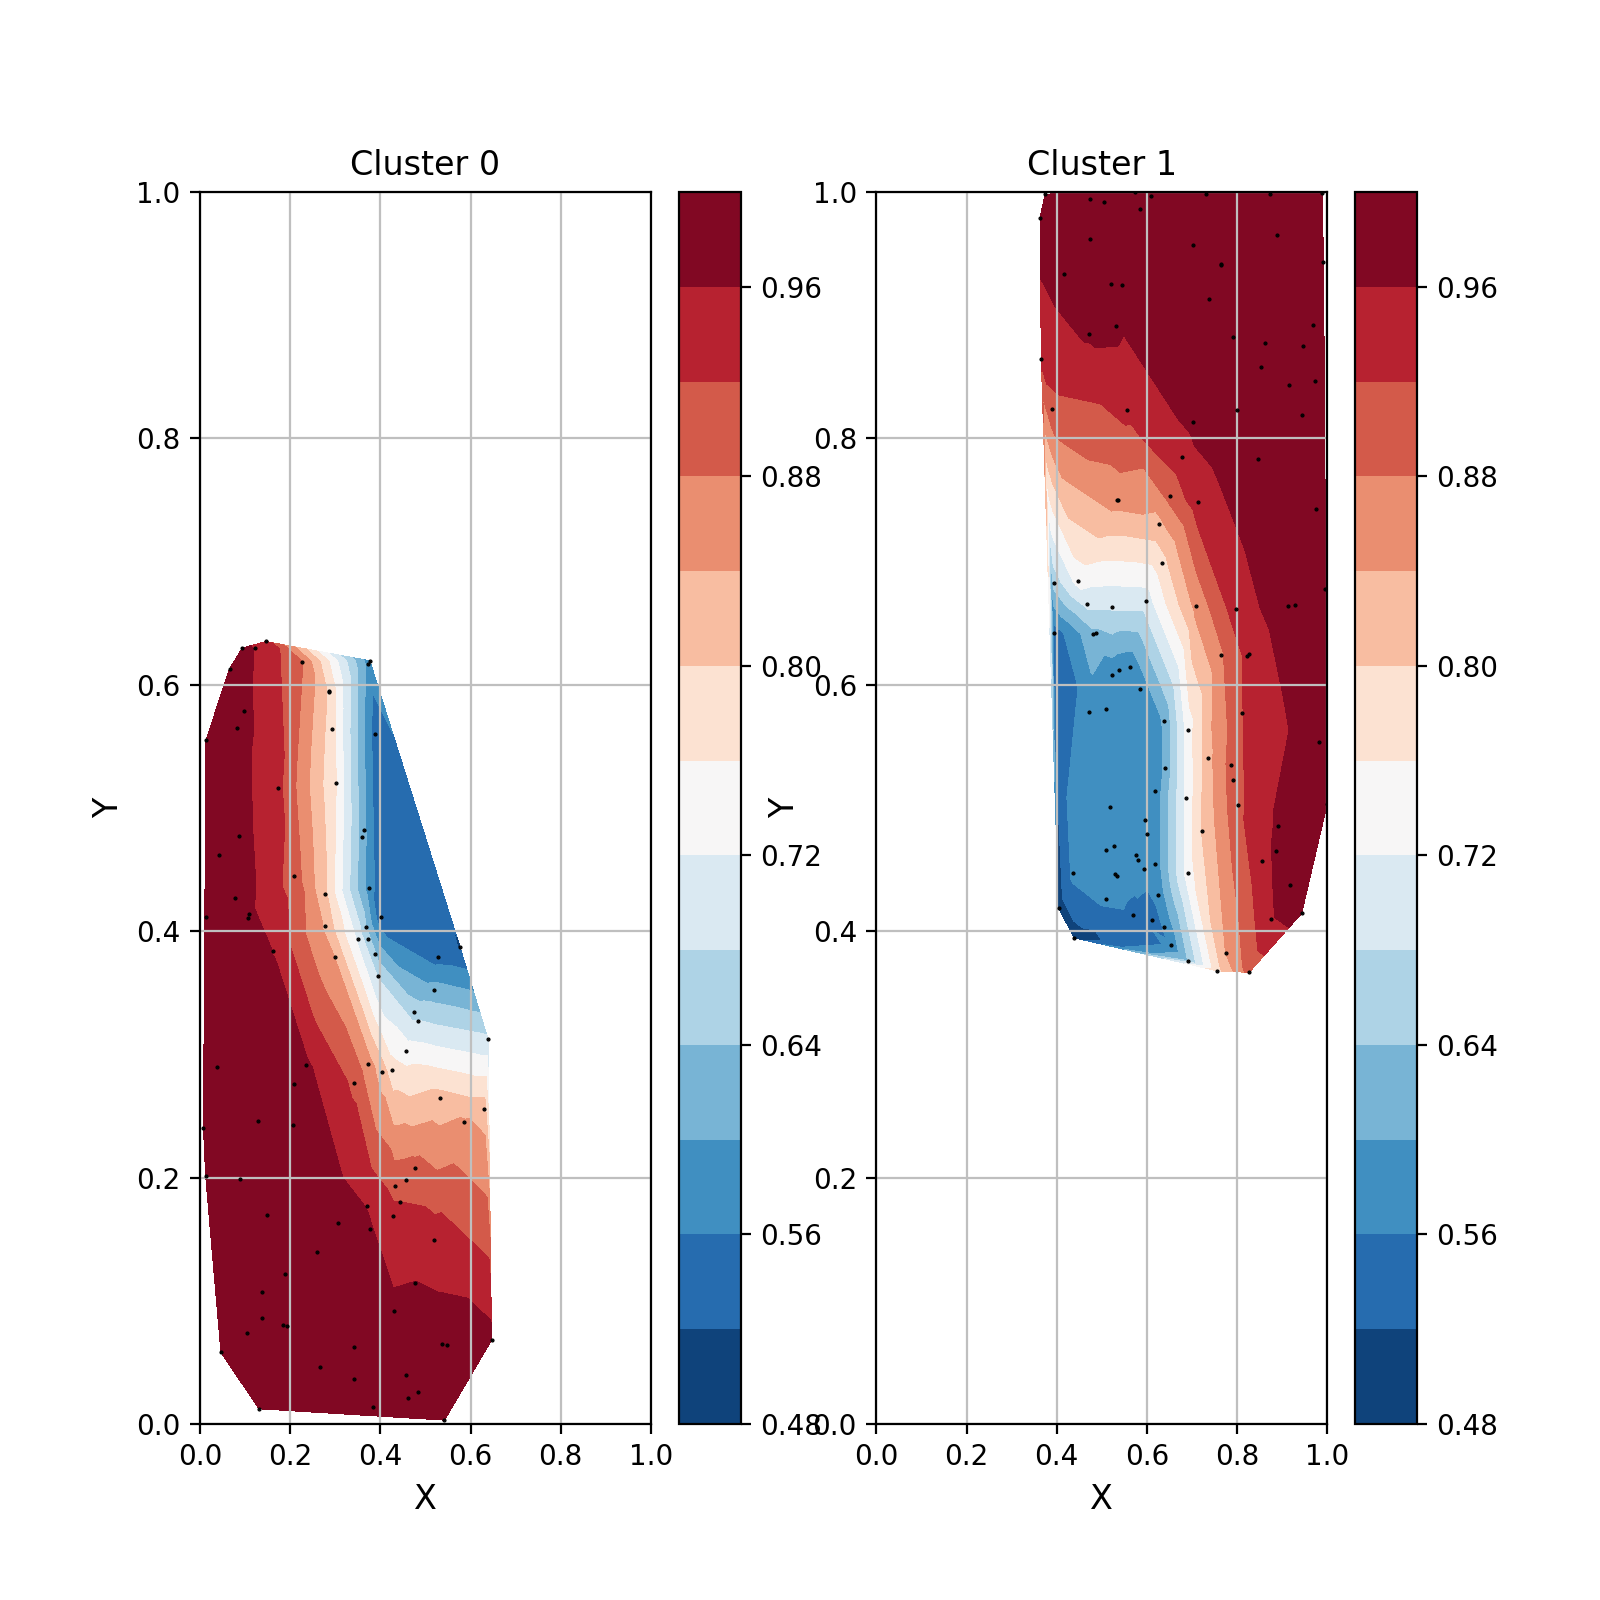

In [12]:
#plot out clusters memebership
fig = plt.figure(figsize=(8,8))
nplots = (int(np.ceil(len(unique_ks)/2)), 2)
for i in range(len(unique_ks)):
    data_contour, scores, _ = unpack_results(pred,target=i)
    plot_countour(fig, data_contour,scores, sub_index=i+1,nplots=nplots)
# plt.savefig("part_contour_2.png")

## Cluster segmentation by argmax

In [13]:
def get_clusters(pred):
    ks = []
    for result in pred:
        #unpack prediction
        res = [score for _, score in result]
        idxMax = np.argmax(res)
        k, _ = result[idxMax]
        ks.append(k)
    return ks

In [14]:
ks = get_clusters(pred)

<IPython.core.display.Javascript object>


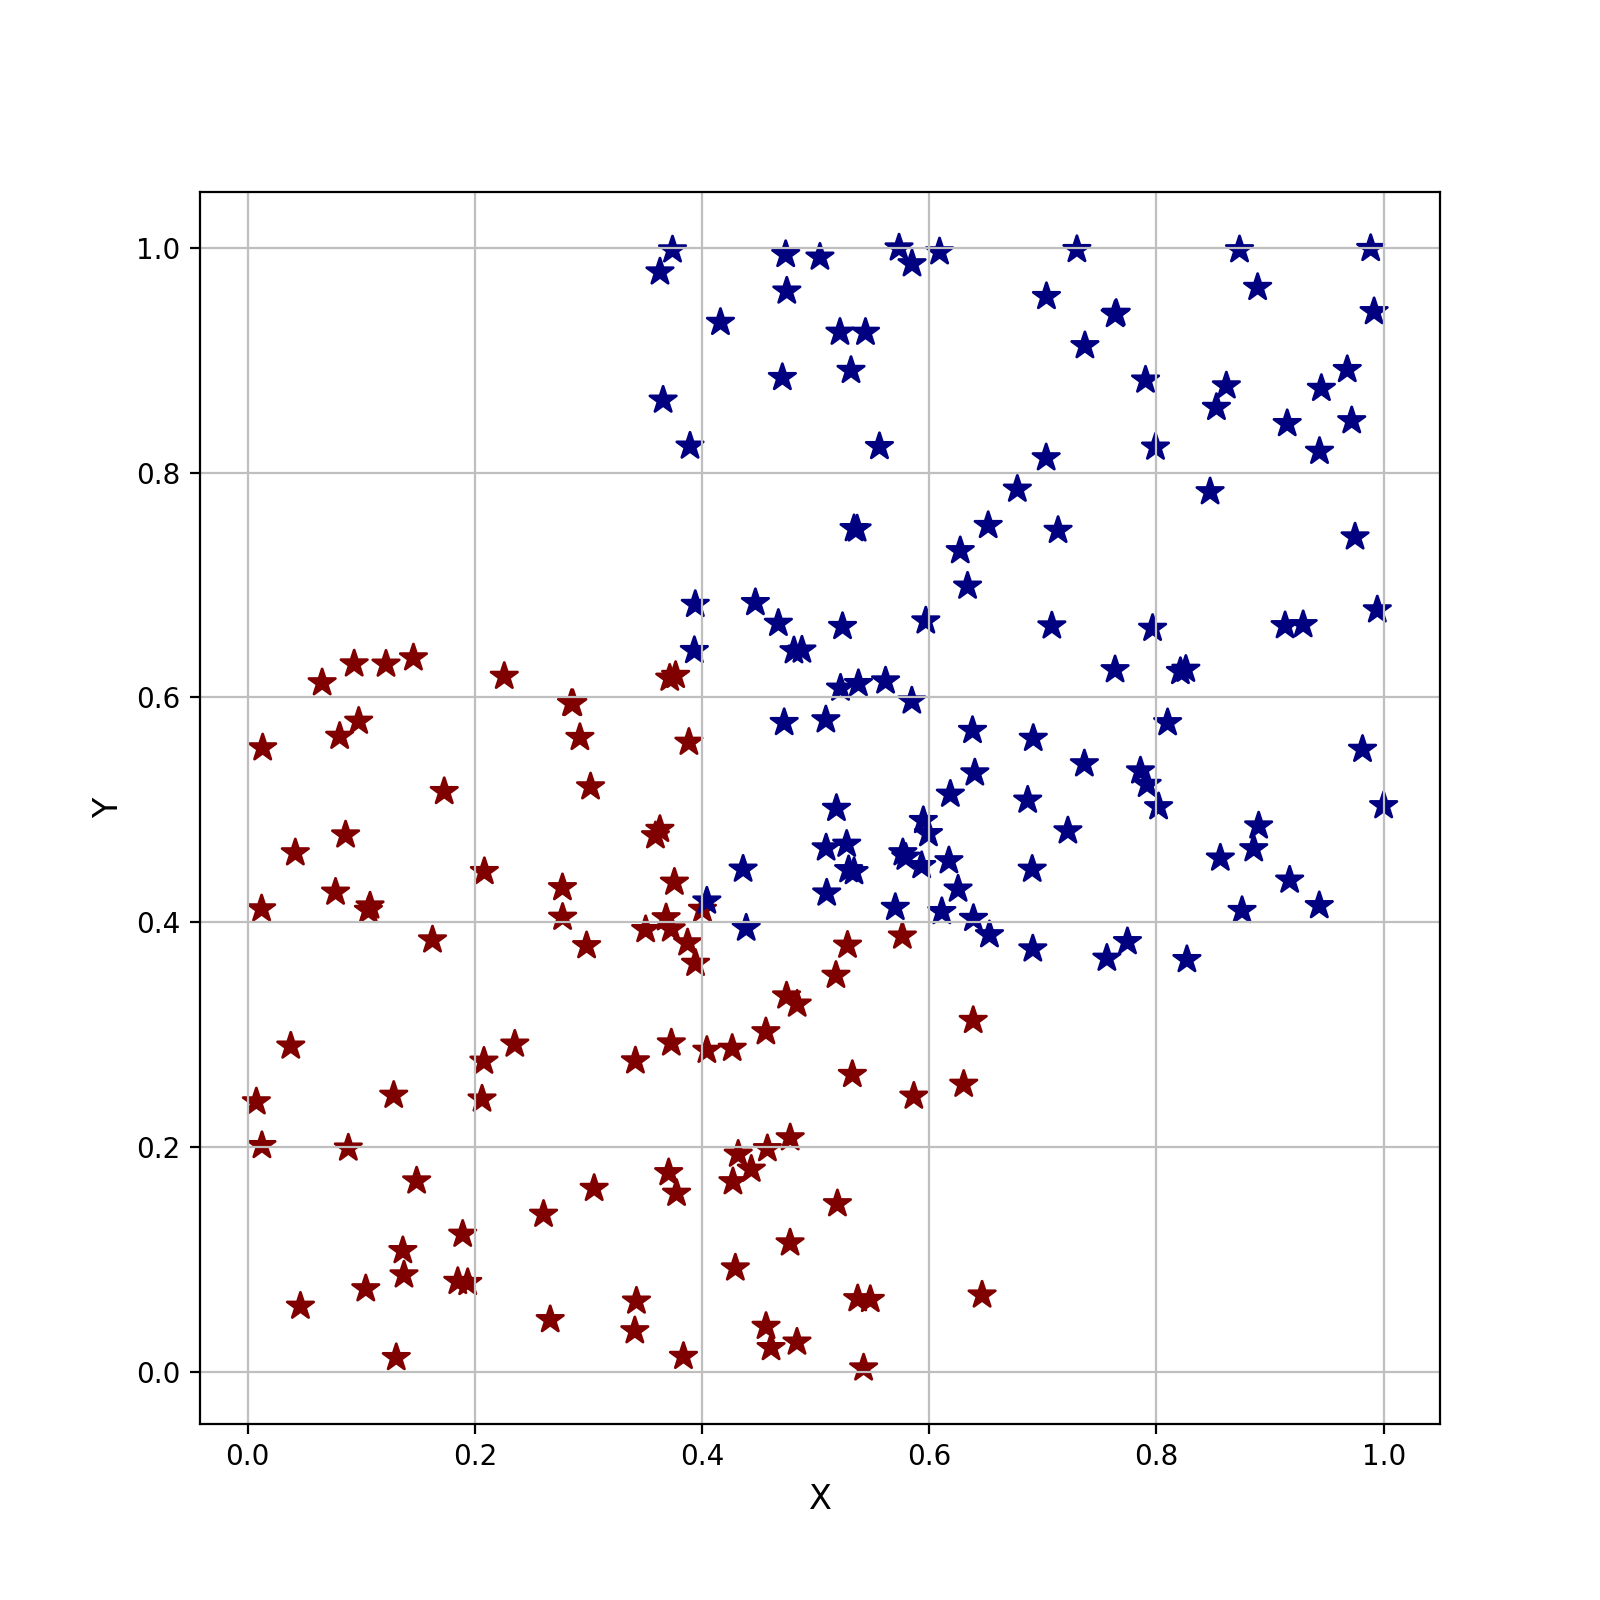

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_title(" ",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
# ax.set_ylabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
color = [c+1 for c in ks]
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=color, marker = '*', cmap = cm.jet_r );

plt.show()
# plt.savefig("part_correct_2.png")

In [16]:
color

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1]

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [18]:
dic = {1: 0,2: 1}
color = list(map(lambda i: dic[i], color))

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score, accuracy_score, normalized_mutual_info_score

def obtain_metrics(x, y_true, y_pred):
    results = dict({})
    results["silhouette_score"] = silhouette_score(x, y_pred)
    results["davies_bouldin_score"] = davies_bouldin_score(x, y_pred)
    results["normalized_mutual_info_score"] = normalized_mutual_info_score(y_true, y_pred)
    results["precision_score"] = precision_score(y_true, y_pred)
    results["recall_score"] = recall_score(y_true, y_pred)
    results["f1_score"] = f1_score(y_true, y_pred)
    results["accuracy_score"] = accuracy_score(y_true, y_pred)
    return results

In [20]:
obtain_metrics(sample_data.data_normalized, y, color)

{'silhouette_score': 0.40097553,
 'davies_bouldin_score': 0.9408553154778507,
 'normalized_mutual_info_score': 0.6190960861863791,
 'precision_score': 0.8818181818181818,
 'recall_score': 0.97,
 'f1_score': 0.9238095238095237,
 'accuracy_score': 0.92}